## Modelo baseado no sistema presa-predador para simular a criação de peixes em cativeiro.
---
definição de tanque

In [230]:
import random
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

quantidade_ciclos = 365*3
peso_comercial = 750
peso_limite = 1250
limite = 1000000
peixes_iniciais = 500

class Tanque:
  def __init__(self, peixes_iniciais, limite, peso_comercial, peso_limite):
    self.peixes = []
    for i in range(peixes_iniciais):
      self.peixes.append(random.randint(2, 4))
    
    self.limite = limite
    self.peso_comercial = peso_comercial
    self.peso_limite = peso_limite
    self.ultima_pesca = 0
    self.ultimo_disperdicio = 0

  def quantidade_comercial(self):
    quantidade_comercial = 0
    for peixe in self.peixes:
      if peixe > self.peso_comercial:
        quantidade_comercial += 1

    return quantidade_comercial

  def ciclo(self):
    j = 0
    peixes_reprodutores = 0
    self.ultimo_disperdicio = 0
    for i in range(len(self.peixes)):
      if self.peixes[j] > self.peso_limite:
        self.ultimo_disperdicio += self.peixes[j]
        self.peixes.pop(j)
      else:
        self.peixes[j] += (3 + random.randint(0, 4))
        
        if self.peixes[j] > 250:
          peixes_reprodutores += 1
        j += 1
    
    while(sum(self.peixes) > self.limite):
      self.ultimo_disperdicio += self.peixes[-1]
      self.peixes.pop()

    novos_peixes = int(peixes_reprodutores*0.01)
    for i in range(novos_peixes):
      if sum(self.peixes) < self.limite:
        self.peixes.append(random.randint(2, 4))

  def pesca(self, quantidade):
    j = 0
    p = 0
    self.ultima_pesca = 0
    for i in range(len(self.peixes)):
      if self.peixes[j] >= self.peso_comercial and p < quantidade:
        self.ultima_pesca += self.peixes[j]
        self.peixes.pop(j)
        p += 1
      else:
        j += 1

In [231]:
def plota_grafico(nome, pesca, peixes, disperdicio, total_producao, ciclos):
  plt.rcParams["figure.figsize"] = (12, 12)
  figure, axis = plt.subplots(2, 2)
  figure.suptitle(nome)

  axis[0, 0].plot(ciclos, total_producao, "y")
  axis[0, 0].set_title("Produção acumulada ( KG )")
  axis[0, 0].grid(True)

  axis[0, 1].plot(ciclos, peixes, "g")
  axis[0, 1].set_title("Peixes por ciclo ( Unidade )")
  axis[0, 1].grid(True)

  axis[1, 0].plot(ciclos, pesca, "b")
  axis[1, 0].set_title("Pesca por ciclo ( KG )")
  axis[1, 0].grid(True)

  axis[1, 1].plot(ciclos, disperdicio, "r")
  axis[1, 1].set_title("Desperdício por ciclo ( KG )")
  axis[1, 1].grid(True)

  plt.show()
  plt.close()

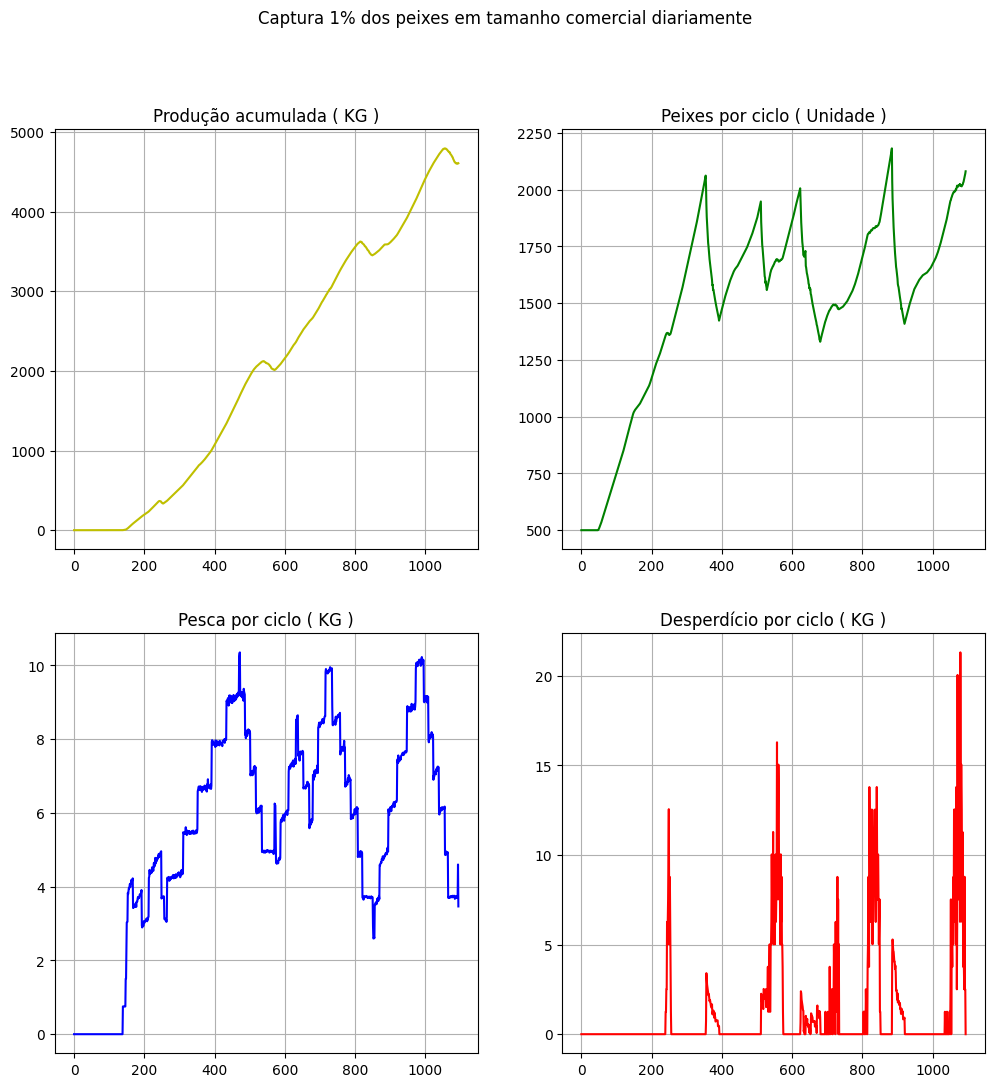

In [232]:
tanque = Tanque(peixes_iniciais, limite, peso_comercial, peso_limite)
pesca = []
quantidade = []
disperdicio = []
producao = []
for i in range(quantidade_ciclos):
  tanque.ciclo()
  tanque.pesca(math.ceil(tanque.quantidade_comercial()*0.01))

  pesca.append(tanque.ultima_pesca/1000)
  disperdicio.append(tanque.ultimo_disperdicio/1000)
  quantidade.append(len(tanque.peixes))
  producao.append(sum(pesca)-sum(disperdicio))

plota_grafico("Captura 1% dos peixes em tamanho comercial diariamente", pesca, quantidade, disperdicio, producao, range(quantidade_ciclos))


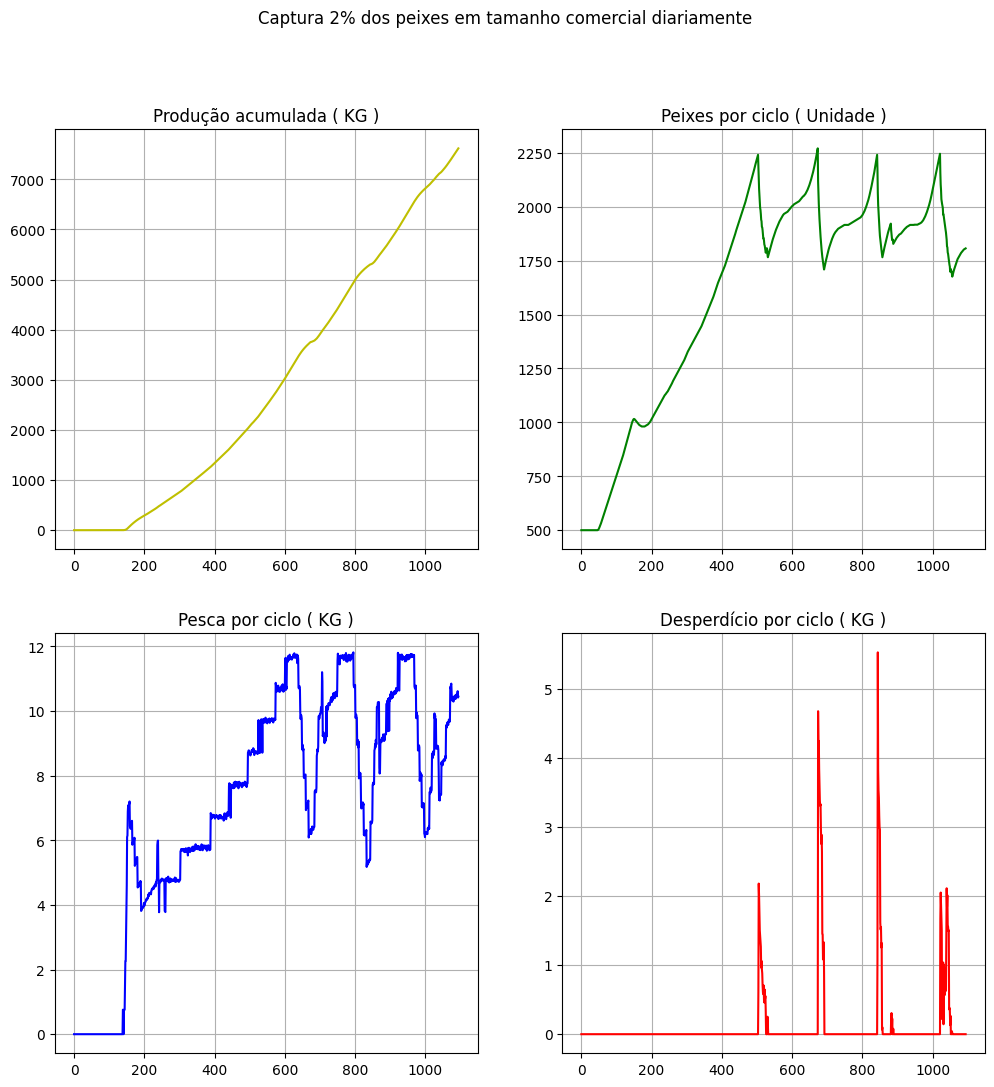

In [233]:
tanque = Tanque(peixes_iniciais, limite, peso_comercial, peso_limite)
pesca = []
quantidade = []
disperdicio = []
producao = []
for i in range(quantidade_ciclos):
  tanque.ciclo()
  tanque.pesca(math.ceil(tanque.quantidade_comercial()*0.02))

  pesca.append(tanque.ultima_pesca/1000)
  disperdicio.append(tanque.ultimo_disperdicio/1000)
  quantidade.append(len(tanque.peixes))
  producao.append(sum(pesca)-sum(disperdicio))

plota_grafico("Captura 2% dos peixes em tamanho comercial diariamente", pesca, quantidade, disperdicio, producao, range(quantidade_ciclos))

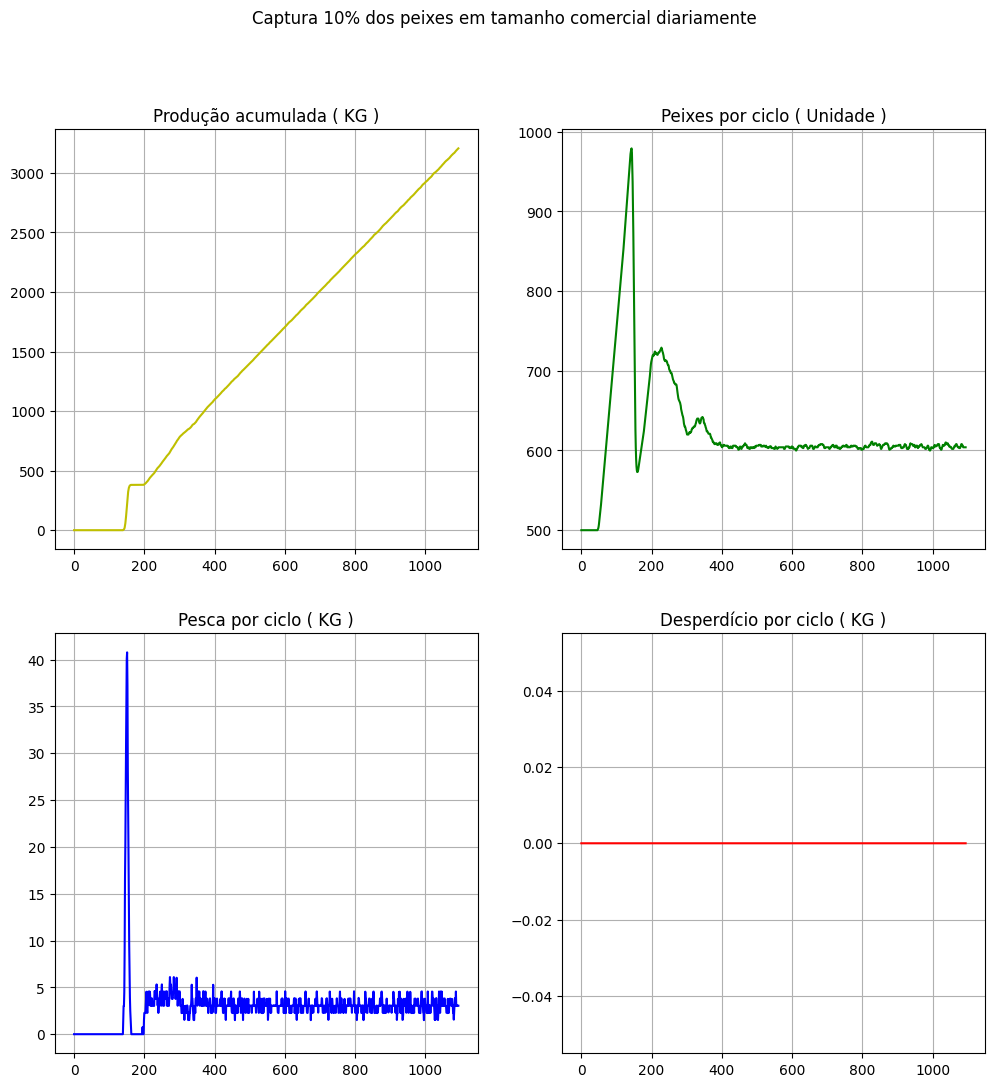

In [234]:
tanque = Tanque(peixes_iniciais, limite, peso_comercial, peso_limite)
pesca = []
quantidade = []
disperdicio = []
producao = []
for i in range(quantidade_ciclos):
  tanque.ciclo()
  tanque.pesca(math.ceil(tanque.quantidade_comercial()*0.4))

  pesca.append(tanque.ultima_pesca/1000)
  disperdicio.append(tanque.ultimo_disperdicio/1000)
  quantidade.append(len(tanque.peixes))
  producao.append(sum(pesca)-sum(disperdicio))

plota_grafico("Captura 10% dos peixes em tamanho comercial diariamente", pesca, quantidade, disperdicio, producao, range(quantidade_ciclos))

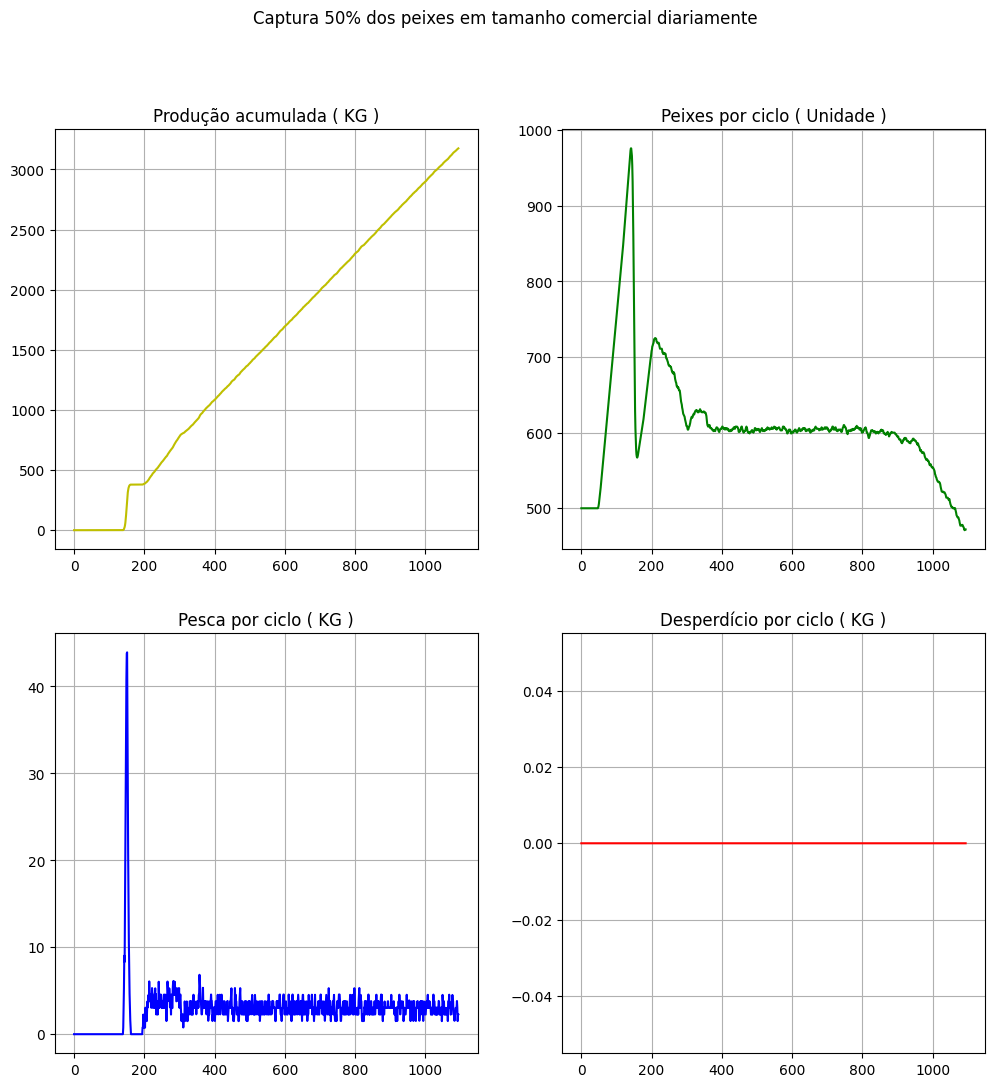

In [235]:
tanque = Tanque(peixes_iniciais, limite, peso_comercial, peso_limite)
pesca = []
quantidade = []
disperdicio = []
producao = []
for i in range(quantidade_ciclos):
  tanque.ciclo()
  tanque.pesca(math.ceil(tanque.quantidade_comercial()*0.5))

  pesca.append(tanque.ultima_pesca/1000)
  disperdicio.append(tanque.ultimo_disperdicio/1000)
  quantidade.append(len(tanque.peixes))
  producao.append(sum(pesca)-sum(disperdicio))

plota_grafico("Captura 50% dos peixes em tamanho comercial diariamente", pesca, quantidade, disperdicio, producao, range(quantidade_ciclos))

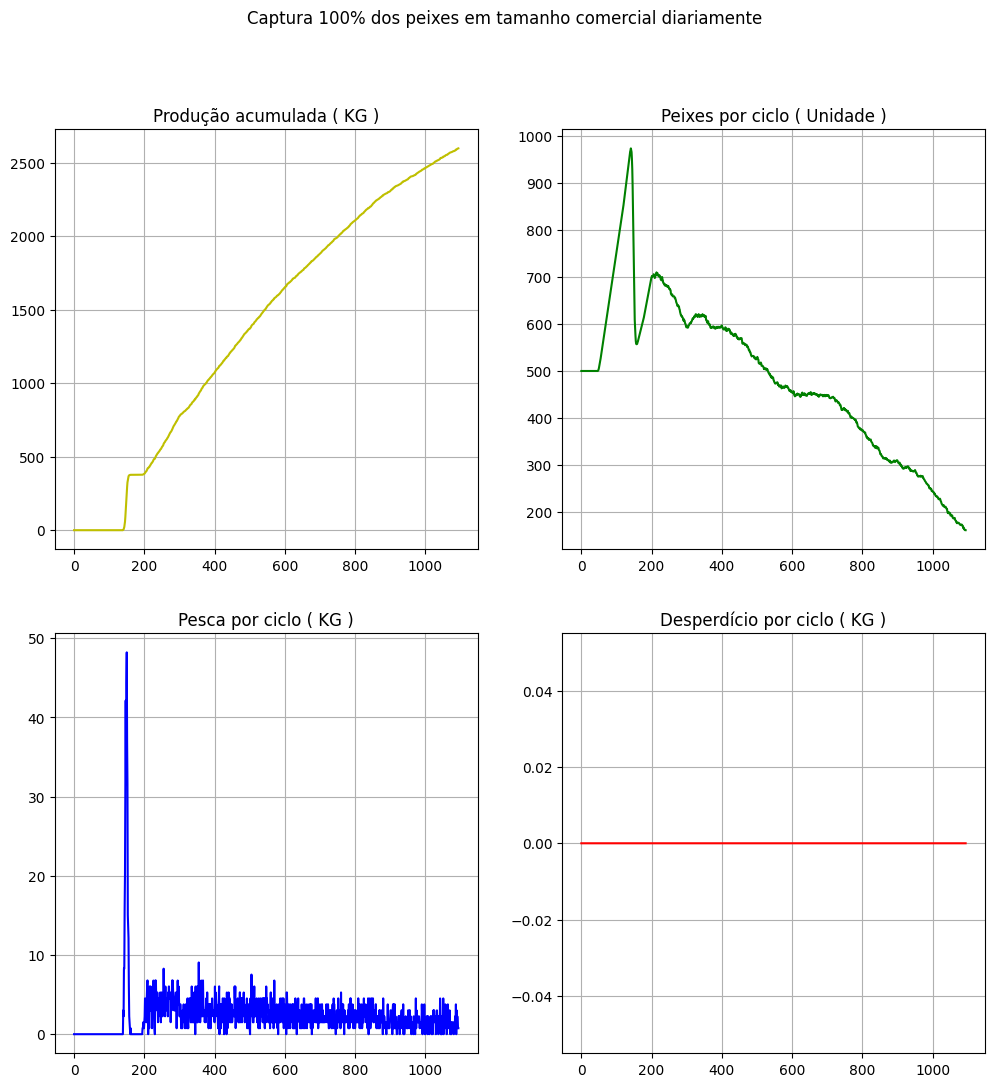

In [236]:
tanque = Tanque(peixes_iniciais, limite, peso_comercial, peso_limite)
pesca = []
quantidade = []
disperdicio = []
producao = []
for i in range(quantidade_ciclos):
  tanque.ciclo()
  tanque.pesca(math.ceil(tanque.quantidade_comercial()*1))

  pesca.append(tanque.ultima_pesca/1000)
  disperdicio.append(tanque.ultimo_disperdicio/1000)
  quantidade.append(len(tanque.peixes))
  producao.append(sum(pesca)-sum(disperdicio))

plota_grafico("Captura 100% dos peixes em tamanho comercial diariamente", pesca, quantidade, disperdicio, producao, range(quantidade_ciclos))

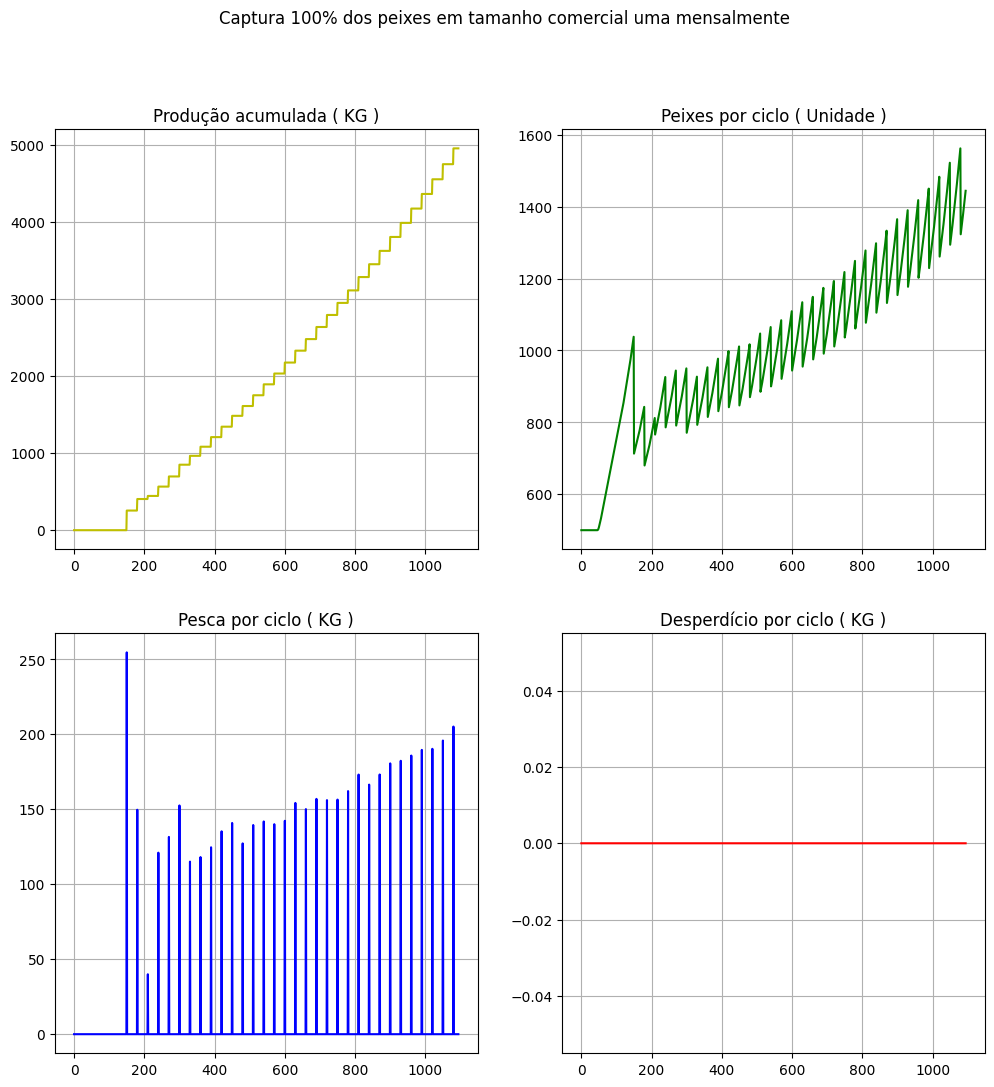

In [237]:
tanque = Tanque(peixes_iniciais, limite, peso_comercial, peso_limite)
pesca = []
quantidade = []
disperdicio = []
producao = []
for i in range(quantidade_ciclos):
  tanque.ciclo()
  if(i%30 == 0):
    tanque.pesca(math.ceil(tanque.quantidade_comercial()*1))
  else:
    tanque.pesca(math.ceil(0))

  pesca.append(tanque.ultima_pesca/1000)
  disperdicio.append(tanque.ultimo_disperdicio/1000)
  quantidade.append(len(tanque.peixes))
  producao.append(sum(pesca)-sum(disperdicio))

plota_grafico("Captura 100% dos peixes em tamanho comercial uma mensalmente", pesca, quantidade, disperdicio, producao, range(quantidade_ciclos))

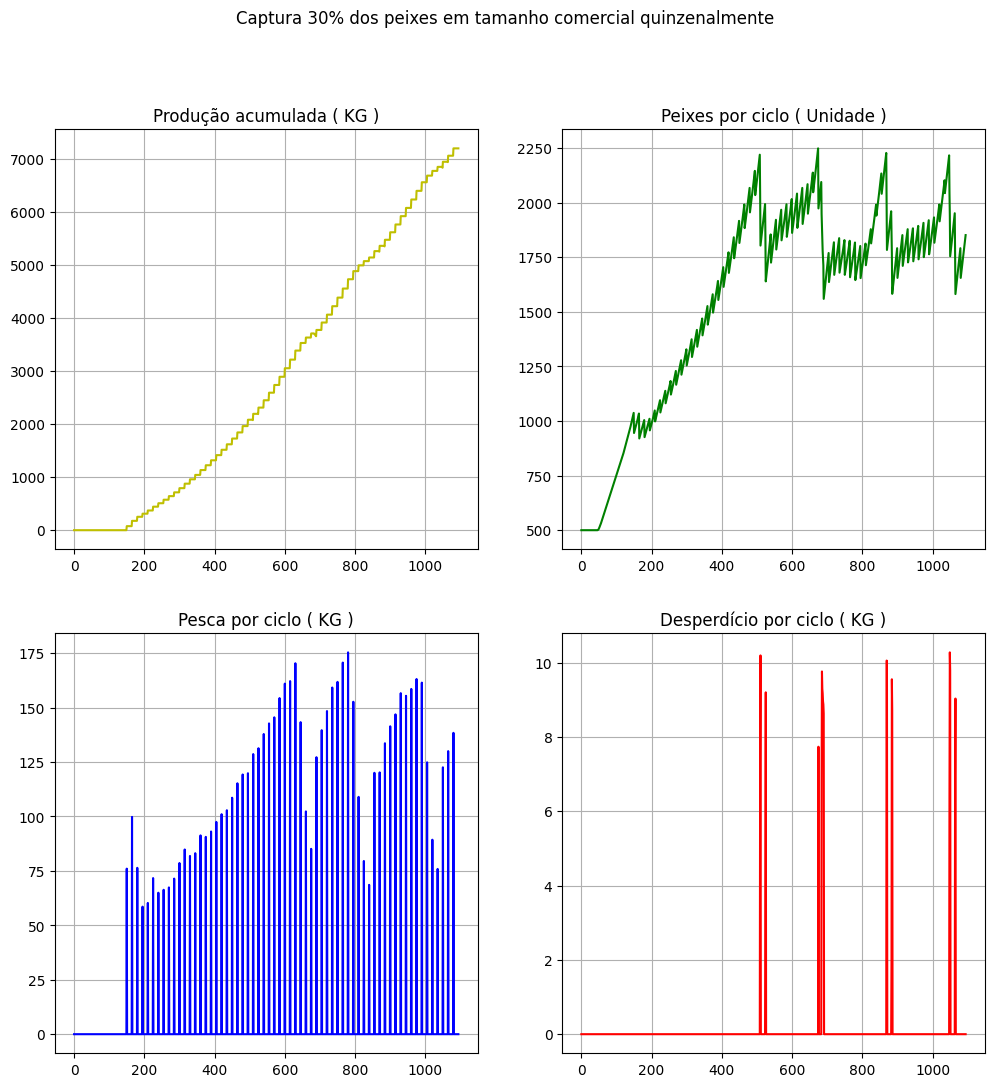

In [238]:
tanque = Tanque(peixes_iniciais, limite, peso_comercial, peso_limite)
pesca = []
quantidade = []
disperdicio = []
producao = []
for i in range(quantidade_ciclos):
  tanque.ciclo()
  if(i%15 == 0):
    tanque.pesca(math.ceil(tanque.quantidade_comercial()*0.30))
  else:
    tanque.pesca(math.ceil(0))

  pesca.append(tanque.ultima_pesca/1000)
  disperdicio.append(tanque.ultimo_disperdicio/1000)
  quantidade.append(len(tanque.peixes))
  producao.append(sum(pesca)-sum(disperdicio))

plota_grafico("Captura 30% dos peixes em tamanho comercial quinzenalmente", pesca, quantidade, disperdicio, producao, range(quantidade_ciclos))